***Todos os vídeos usados nessa aula podem ser encontrados no site https://www.pexels.com/pt-br/***

Nesta aula faremos a lógica que seja capaz de captar o rosto das pessoas (em vídeos ou pela webcam) e acompanhar os seus movimentos. E claro, com o menor número de linhas possível.

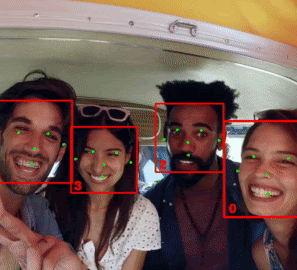

O que diferencia a detecção do rosto e das expressões faciais é que no primeiro caso não há as landmarks (como visto na figura acima). As landmarks serão implementadas na Aula 7.

Antes de começar efetivamente, devemos instalar duas bibliotecas: a Mediapipe e a OpenCV. Para isso, faremos de duas maneiras. A primeira é usando o **pip** no prompt de comando:
- Para o Mediapipe: `pip install mediapipe`
- Para o OpenCV: `pip install opencv-python`

Se você estiver usando o Jupyter pode fazer isso dentro de uma célula de comando, basta colocar um ponto de exclamação (!) no começo:
- Para o Mediapipe: `!pip install mediapipe`
- Para o OpenCV: `!pip install opencv-python`

### Importar as bibliotecas

In [1]:
import cv2  # OpenCV
import mediapipe as mp  # Mediapipe
import time  # usada para verificar o FPS

### Criar os módulos

Vamos criar alguns módulos para que fique mais fácil de fazer o código e mais legível (além de evitar bugs).

In [2]:
# Rosto
mpDeteccaoRosto = mp.solutions.face_detection
rosto = mpDeteccaoRosto.FaceDetection()

# Desenhar o quadrado em volta do rosto
mp_desenho = mp.solutions.drawing_utils

Vamos saber o que tem dentro desse nosso módulo *maos* criado. Para isso, basta colocar dois pontos de interrogação (??) antes do módulo que abrirá uma janela com o código fonte.

In [3]:
??rosto

Há somente dois parâmetros em nosso módulo *rosto*, vamos ver o que fazem:
- `min_detection_confidence`: Valor de confiança mínimo entre 0 e 1 para que a detecção seja considerável confiável. O padrão é **0.5**.
- `model_selection`: Um valor inteiro (0 ou 1). Se 0, o alcance para detecção será até 2 metros de distância. Se 1, o alcance para detecção será de 2 a 5 metros de distância. O padrão é **0**.

### Taxa de FPS

O FPS é a taxa de quantas fotos está sendo mostrada por segundo. Os vídeo ficaram entre 25 e 30 FPS, mas se algum deles ficou muito rápido (mais do que 70 FPS), você pode alterar o valor de `cv2.waitKey()` para um valor maior de delay.

In [4]:
tempo_anterior = 0
tempo_atual = 0

### Captura de vídeo

In [5]:
# Informar se será um vídeo (passar o caminho), o a webcam (passando o valor 0)
video = 0
cap = cv2.VideoCapture(video)

while True:
    sucesso, imagem = cap.read()
    
    # Converter a cor da imagem (o Mediapipe usa somente imagens em RGB e o OpenCV captura em BGR)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    # Resultado do processamento da imagem
    resultados = rosto.process(imagem_rgb)
    
    # Colocar o quadrado ao redor do rosto
    if resultados.detections:
        for item, deteccao in enumerate(resultados.detections):
            # como o caminho para pegar as informações das detecção são longos, vamos armazená-lo em um variável
            classe_caixa_delimitadora = deteccao.location_data.relative_bounding_box
            
            # transformar as posições em pixels da tela
            altura, largura, canal = imagem.shape
            caixa_delimitadora = int(classe_caixa_delimitadora.xmin*largura), int(classe_caixa_delimitadora.ymin*altura),\
            int(classe_caixa_delimitadora.width*largura), int(classe_caixa_delimitadora.height*altura)
            
            # passar a imgem original (sem conversão), pois é ela que é mostrada na tela
            # vamos desenhar nós mesmo o quadrado ao redor do rosto, desse modo podemos retirar as marcações e
            # adicionar mais coisas ao redor desse quadrado
            # em ordem: imagem, posição do qudrado, cor e espessura
            cv2.rectangle(imagem, caixa_delimitadora, (0, 255, 0), 2)
            
            # vamos colocar agora a porcentagem de certeza de que é um rosto no topo do quadrado
            # usaremos a mesma escrita que a usada no FPS
            cv2.putText(imagem, f'{int(deteccao.score[0]*100)}%', (caixa_delimitadora[0], caixa_delimitadora[1]-20),
                       cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2)
    
    # Configurar o FPS de captura
    tempo_atual = time.time()
    fps = 1/(tempo_atual - tempo_anterior)
    tempo_anterior = tempo_atual
    
    # Colocar o valor de FPS na tela
    # em ordem: a iamgem que será colocado o texto, o texto, a posição na imagem, fonte, tamanho, cor e largura
    cv2.putText(imagem, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 2)
    
    # Mostrar a imagem na tela
    cv2.imshow('Imagem', imagem)
    
    # Terminar o loop
    if cv2.waitKey(15) & 0xFF == ord('s'):
        break
        
# Fechar a tela de captura
cap.release()
cv2.destroyAllWindows()